In [86]:
import numpy as np
import qiskit
from qiskit_aer import AerSimulator
simulator = AerSimulator()

In [88]:
numShots = 1024*4

In [117]:
def integerToIndices(integer, numQbits = 15):
    indicesOut = [0 for _ in range(numQbits)]
    binaryRep = bin(int(integer))[2:]
    indicesOut[:len(binaryRep)] = [int(item) for item in binaryRep]
    return indicesOut

def countsToTensorForm(countsDict, numQbits = 15):
    tensorOut = np.zeros((2,)*numQbits)
    for key,value in countsDict.items():
        indices = integerToIndices(key, numQbits)
        tensorOut[tuple(indices)] = value
    return tensorOut
def qiskitcountsToTensorForm(countsDict, numQbits = 15):
    tensorOut = np.zeros((2,)*numQbits)
    for key,value in countsDict.items():
        indices = [int(item) for item in list(key)]
        tensorOut[tuple(int(item) for item in list(key))] = value
    return tensorOut

def contractEverythingButt(tensorIn,relAxes):
    return tensorIn.sum(axis=tuple([item for item in range(len(tensorIn.shape)) if item not in relAxes]))

In [166]:
numNodes = 5
def makeCirc():
    n = numNodes
    edges = [[0,1],[1,2],[2,3],[3,4],[4,0]]
    edges = [[0,1],[0,2],[0,3],[0,4]]
    # edges = [[0,1],[0,2],[1,2],[0,3],[1,3],[2,3]]
    # edges = [[0,1],[2,3]]
    # edges = [[0,1],[2,3]]
    circInner = qiskit.QuantumCircuit(n)
    for i in range(n):
        circInner.h(i)
    for edge in edges:
        circInner.cz(edge[0],edge[1])
        # circInner.cz(edge[0],edge[1])
    # circInner.draw("mpl",style="iqp")
    return circInner

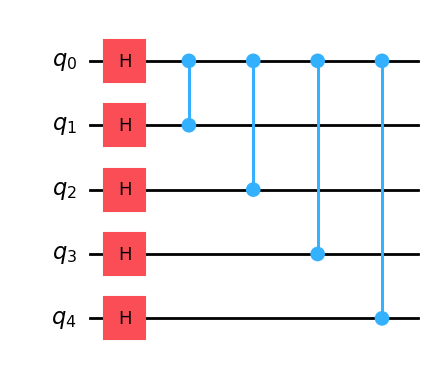

In [167]:
circUs = makeCirc()
circUs.draw("mpl",style="iqp")

128.0
{'00001': 1063, '11110': 983, '11111': 944, '00000': 1106}


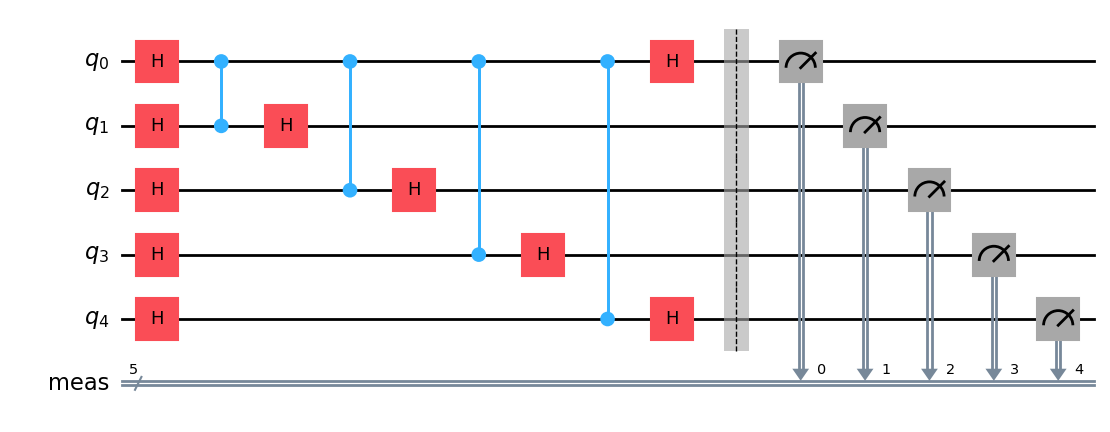

In [168]:
circUs = makeCirc()
# circUs.cz(0,1)
for i in range(numNodes):
    circUs.h(i)
circUs.measure_all()
circUs = qiskit.transpile(circUs,simulator)
result = simulator.run(circUs,shots=numShots).result()
counts = result.get_counts(0)
print(numShots/2**numNodes)
print(counts)
circUs.draw("mpl",style="iqp")

In [159]:
qiskitcountsToTensorForm(counts,numNodes)

array([[[[[  0., 273.],
          [279.,   0.]],

         [[232.,   0.],
          [  0., 239.]]],


        [[[260.,   0.],
          [  0., 232.]],

         [[  0., 237.],
          [261.,   0.]]]],



       [[[[245.,   0.],
          [  0., 257.]],

         [[  0., 272.],
          [254.,   0.]]],


        [[[  0., 265.],
          [274.,   0.]],

         [[266.,   0.],
          [  0., 250.]]]]])

In [113]:
wedgechnode0 = {'011': 2587, '000': 2447, '111': 2466, '100': 2500}
chnode1 = {'011': 2529, '110': 2529, '101': 2453, '000': 2489}
chnode2 = {'111': 2439, '001': 2518, '110': 2537, '000': 2506}

In [81]:
circUs = makeCirc()
# circUs.cx(0,1)
# circUs.cx(0,2)
# circUs.cx(0,3)
circUs.h(0)
# circUs.h(1)
# circUs.h(2)
# circUs.h(3)
circUs.measure_all()
circUs = qiskit.transpile(circUs,simulator)
result = simulator.run(circUs,shots=numShots).result()
counts = result.get_counts(0)
print(counts)

{'011': 2587, '000': 2447, '111': 2466, '100': 2500}


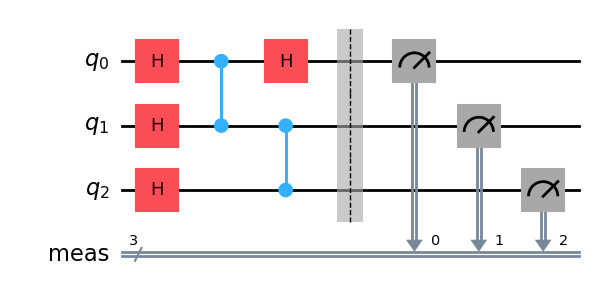

In [82]:
circUs.draw("mpl",style="iqp")

In [51]:
# n = 8
# edges = [[0,1],[0,2],[1,2],[0,3],[3,4],[4,5],[3,5],[6,7]]
# circ = qiskit.QuantumCircuit(n)
# for i in range(n):
#     circ.h(i)
# for edge in edges:
#     circ.cz(edge[0],edge[1])
circ.draw("mpl",style="iqp")

NameError: name 'circ' is not defined

In [176]:
# THIS TELLS US THAT THERE IS A TEST FOR GRAPH-STATE:
#  if applying a hadamard to a qbit, get 2^n / 2 states

numShots = 1024*4

for i in range(n):
    circ = qiskit.QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    for edge in edges:
        circ.cz(edge[0],edge[1])
    circ.h(i)
    circ.measure_all()
    circ = qiskit.transpile(circ,simulator)
    result = simulator.run(circ,shots=numShots).result()
    counts = result.get_counts(0)
    print("output states with nonzero probability is at least: ", len(counts))
# qiskit.visualization.plot_histogram(counts_ideal)

output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128
output states with nonzero probability is at least:  128


In [177]:
# TESTING if we can get the existence of a single edge
#  if edge, hadamard the two nodes gives 2^n states
testEdges = edges
supportSizes = []
for testEdge in testEdges:
    circ = qiskit.QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    for edge in edges:
        circ.cz(edge[0],edge[1])
    circ.h(testEdge[0])
    circ.h(testEdge[1])
    circ.measure_all()
    circ = qiskit.transpile(circ,simulator)
    result = simulator.run(circ,shots=numShots).result()
    counts = result.get_counts()
    supportSizes.append(len(counts))
    # print(len(counts))
unique, counts = np.unique(supportSizes, return_counts=True)
print(unique, counts)

[256] [8]


In [178]:
#  if not an edge, hadamard the two nodes gives 2^n / 4 states
allDyads = [[j,i] for i in range(n) for j in range(i)]
supportSizes = []
for testEdge in allDyads:
    circ = qiskit.QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    for edge in edges:
        circ.cz(edge[0],edge[1])
    circ.h(testEdge[0])
    circ.h(testEdge[1])
    circ.measure_all()
    circ = qiskit.transpile(circ,simulator)
    result = simulator.run(circ,shots=numShots).result()
    counts = result.get_counts()
    supportSizes.append(len(counts))
    # print(len(counts))
np.histogram(supportSizes)[0]

array([20,  0,  0,  0,  0,  0,  0,  0,  0,  8])

In [180]:
n = 12
edges = [[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,0],[0,2],[0,3]]
circ = qiskit.QuantumCircuit(n)
for i in range(n):
    circ.h(i)
for edge in edges:
    circ.cz(edge[0],edge[1])
circ.h(0)
circ.measure_all()
circ = qiskit.transpile(circ,simulator)
result = simulator.run(circ,shots=numShots).result()
counts = result.get_counts()

In [181]:
tensorCounts = qiskitcountsToTensorForm(counts, numQbits = n)

In [182]:
for i in range(12):
    print(contractEverythingButt(tensorCounts,[i]))

[2054. 2042.]
[2050. 2046.]
[2076. 2020.]
[2078. 2018.]
[2073. 2023.]
[2032. 2064.]
[2076. 2020.]
[2052. 2044.]
[2072. 2024.]
[2054. 2042.]
[2099. 1997.]
[1997. 2099.]


In [183]:
integerToIndices('35', numQbits = 15)

[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [184]:
np.sum(tensorCounts)

4096.0

In [185]:
n = 3
circ = qiskit.QuantumCircuit(n)
circ.h(0)

circ.h(1)
circ.h(2)
### end them, begin us
circ.h(1)
# circ.h(2)
circ.measure_all()
circ = qiskit.transpile(circ,simulator)
result = simulator.run(circ,shots=numShots).result()
counts = result.get_counts()
print(counts)

{'001': 1004, '100': 1054, '101': 1005, '000': 1033}


In [120]:
counts

{'011': 1041, '000': 1012, '110': 1030, '101': 1013}